In [90]:
import sys
import numpy as np
import pandas as pd
#from tqdm import tqdm
from fastai.structured import *
from fastai.column_data import *
sys.path.append('../')
from sklearn.model_selection import *


In [91]:
DATA_PATH = 'data/'
TRAIN_PATH = DATA_PATH + 'train.csv' 
TEST_PATH = DATA_PATH + 'test.csv' 

In [229]:
df_train = pd.read_csv(TRAIN_PATH, low_memory=False)
df_test = pd.read_csv(TEST_PATH, low_memory=False)

In [230]:
df_test = df_test.set_index('ID')

In [231]:
df_train['target'] = np.log(df_train['target'])

In [232]:
x, y, nas = proc_df(df_train, 'target', skip_flds=['ID'])

In [233]:
df_train_x, df_val_x, df_train_y, df_val_y= train_test_split(x, y, test_size=0.1, random_state=42)

In [245]:
cat_flds = []
bs = 64

In [246]:
model_data = ColumnarModelData.from_data_frames(
    '.', df_train_x, df_val_x, df_train_y, df_val_y, cat_flds, bs, is_reg=True, is_multi=False, test_df=df_test)

In [247]:
emb_szs = []
n_cont = len(df_train_x.columns)
emb_drop = 0.0
out_sz = 1
szs = [400, 50]
drops = [0.0,0.0]

In [248]:
learner = model_data.get_learner(emb_szs, n_cont, emb_drop, out_sz, szs, drops)

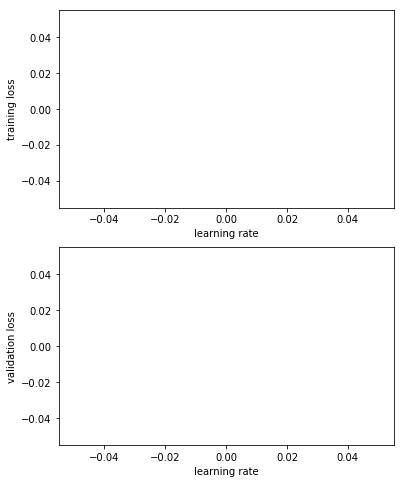

In [250]:
learner.lr_find2(start_lr=1, end_lr=1000, num_it=500)
learner.sched.plot()

In [251]:
learner.unfreeze()

In [253]:
lr = 2000
learner.fit(lr, 10, cycle_len=1)

epoch      trn_loss   val_loss                                
    0      42198.961375 461.706981
    1      10468.599027 7.835425                              
    2      2786.473553 2.845768                               
    3      770.64678  2.851129                                
    4      217.551365 2.833606                           
    5      63.442561  2.86108                             
    6      20.162064  2.832352                            
    7      8.393138   2.844236                            
    8      5.006428   2.831659                            
    9      3.983363   2.881005                            


[array([2.88101])]

In [254]:
lr = 0.1
learner.fit(lr, 10, cycle_len=2)

epoch      trn_loss   val_loss                            
    0      3.079507   2.833066  
    1      3.123246   2.829848                            
    2      3.094381   2.832597                            
    3      3.088666   2.830246                            
    4      3.108702   2.83096                             
    5      3.085965   2.834398                            
    6      3.088766   2.840131                            
    7      3.093017   2.830149                            
    8      3.111632   2.830212                            
    9      3.080652   2.835121                            
    10     3.117236   2.831004                            
    11     3.089574   2.82971                             
    12     3.08811    2.829993                            
    13     3.097826   2.829755                            
    14     3.107365   2.831349                            
    15     3.112074   2.830291                            
    16     3.089337   2

[array([2.83137])]

In [255]:
preds = learner.predict(is_test = True)

In [283]:
df_submission = pd.DataFrame(columns=['ID','target'])
df_submission['ID'] = df_test.index
df_submission['target'] = np.exp(preds)

In [284]:
df_submission.to_csv('submission.csv', index = False)

In [285]:
df_submission

,ID,target
0,000137c73,1928164.875
1,00021489f,1928164.875
2,0004d7953,1928164.875
3,00056a333,1928164.875
4,00056d8eb,1928164.875
5,0005fc190,1928164.875
6,000787e86,1928164.875
7,0008510a0,1928164.875
8,000895faf,1928164.875
9,000986fba,1928164.875
